Portfolio Construction

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels as sm
import matplotlib as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16,8)

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [131]:
dfqs = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//quant_scores.csv', index_col = 0, parse_dates=True)
dftr = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//total_returns.csv', index_col = 0, parse_dates=True)
dfindwt = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//index_wts.csv', index_col = 0, parse_dates=True)
dfpsei = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//pcomp_return.csv', index_col = 0, parse_dates=True)

In [132]:
dfqs.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,NaN,-0.062443,-0.053796,0.307173,0.196642,0.516090,-0.406294,-0.482474,NaN,NaN,...,NaN,0.307173,NaN,NaN,NaN,NaN,0.516090,NaN,NaN,NaN
36950,NaN,-0.035469,-0.050858,0.196175,0.275168,-0.364142,-0.229654,-0.417662,NaN,NaN,...,NaN,0.196175,NaN,NaN,NaN,NaN,-0.364142,NaN,NaN,NaN
36981,NaN,0.258605,0.328888,-0.095036,-0.132697,0.055743,0.147378,0.116802,NaN,NaN,...,NaN,-0.095036,NaN,NaN,NaN,NaN,0.055743,NaN,NaN,NaN
37011,NaN,0.382619,0.074050,-0.842184,-0.392563,0.369888,0.301919,0.543440,NaN,NaN,...,NaN,-0.842184,NaN,NaN,NaN,NaN,0.369888,NaN,NaN,NaN
37042,NaN,-0.540034,0.028212,0.086328,0.624103,0.287636,0.212853,-0.094265,NaN,NaN,...,NaN,0.086328,NaN,NaN,NaN,NaN,0.287636,NaN,NaN,NaN


In [133]:
dfindwt.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,0,0.006037,0.003040,0.0,0.0,0.040741,0.033921,0.010345,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36950,0,0.005268,0.002773,0.0,0.0,0.039673,0.034924,0.010962,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36981,0,0.005131,0.002481,0.0,0.0,0.037337,0.034002,0.008427,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37011,0,0.005381,0.002791,0.0,0.0,0.037172,0.029913,0.008469,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37042,0,0.005188,0.005355,0.0,0.0,0.038619,0.031105,0.009231,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
dfpsei = dfpsei.reset_index()
dfpsei = dfpsei.drop('index', axis=1)
dfpsei.head(5)

,PCOMP TR,PCOMP Price
0,NaN,NaN
1,-0.043003,-0.043574
2,-0.102164,-0.103558
3,-0.046213,-0.046709
4,0.018912,0.017007


In [135]:
#overweight/underweight rules
def OW_UW(qs, s):
    if np.isnan(qs):
        return 0
    elif (qs<-1):
        return s*0
    elif (qs>=-1) & (qs<-0.75):
        return s*-0.25
    elif (qs>=-0.75) & (qs<-0.5):
        return s*-0.5
    elif (qs>=-0.5) & (qs<-0.25):
        return s*-0.5
    elif (qs>=-0.25) & (qs<0):
        return s*-0.5
    elif (qs>=0) & (qs<0.25):
        return s*0
    elif (qs>=0.25) & (qs<0.5):
        return s*0.25
    elif (qs>=0.5) & (qs<0.75):
        return s*0*5
    elif (qs>=0.75) & (qs<1):
        return s*0.5
    elif (qs>=1) & (qs<1.25):
        return s*1
    elif (qs>=1.25) & (qs<1.5):
        return s*1
    elif (qs>=1.5):
        return s*0.5

In [136]:
#creating normalized index weights based on qs
dfpwt = dfindwt
tlt = 1 #tilt max
x, y = dfpwt.shape
for a in range(0,x):
    for b in range(0,y):
        if dfindwt.loc[dfindwt.index[a], dfindwt.columns[b]]==0:
            dfpwt.loc[dfpwt.index[a], dfpwt.columns[b]]=0
        elif dfindwt.loc[dfindwt.index[a], dfindwt.columns[b]]>0:
            dfpwt.loc[dfpwt.index[a], dfpwt.columns[b]] = \
            max(OW_UW(dfqs.loc[dfqs.index[a], dfqs.columns[b]], tlt)/100 \
                + dfindwt.loc[dfpwt.index[a], dfindwt.columns[b]], 0)

dfpwt.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,0,0.001037,0.000000,0.0,0.0,0.040741,0.028921,0.005345,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36950,0,0.000268,0.000000,0.0,0.0,0.034673,0.029924,0.005962,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36981,0,0.007631,0.004981,0.0,0.0,0.037337,0.034002,0.008427,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37011,0,0.007881,0.002791,0.0,0.0,0.039672,0.032413,0.008469,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37042,0,0.000188,0.005355,0.0,0.0,0.041119,0.031105,0.004231,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
#normalization
#x, y = dfpwt.shape
dfsum = pd.DataFrame(dfpwt.sum(axis=1), columns=['Sum'])
dfpwt = dfpwt.divide(dfsum['Sum'], axis=0)

dfpwt.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfpwt.csv')

dfpwt.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,0.0,0.001098,0.000000,0.0,0.0,0.043132,0.030619,0.005659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36950,0.0,0.000284,0.000000,0.0,0.0,0.036661,0.031639,0.006304,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36981,0.0,0.007733,0.005047,0.0,0.0,0.037834,0.034455,0.008539,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37011,0.0,0.007923,0.002806,0.0,0.0,0.039880,0.032583,0.008514,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37042,0.0,0.000194,0.005515,0.0,0.0,0.042351,0.032037,0.004358,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
#reimport

dfpwt = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfpwt.csv' \
                   , index_col = 0, parse_dates=True)

In [139]:
#create drifted portfolio, given rebalancing frequency
dfdwt = dfpwt
#change index to datetime
dfdwt = dfdwt.reset_index()

from datetime import datetime

dfdwt['Date 2'] = dfdwt['index'] + datetime(1900, 1, 1).toordinal() - 2
dfdwt['Date 3'] = dfdwt['Date 2'].apply(datetime.fromordinal)
dfdwt['Date 3'] = dfdwt['Date 3'].apply(pd.to_datetime)
dfdwt['Month'] = dfdwt['Date 3'].map(lambda x: x.month)

#index details transfer to new dataframe, then drop
dfmonth = dfdwt[['index','Date 2','Date 3','Month']]

dfdwt = dfdwt.drop(['index','Date 2','Date 3','Month'], axis=1)
dfdwt.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
0,0.0,0.001098,0.000000,0.0,0.0,0.043132,0.030619,0.005659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000284,0.000000,0.0,0.0,0.036661,0.031639,0.006304,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.007733,0.005047,0.0,0.0,0.037834,0.034455,0.008539,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.007923,0.002806,0.0,0.0,0.039880,0.032583,0.008514,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000194,0.005515,0.0,0.0,0.042351,0.032037,0.004358,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
#export
dfdwt.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfdwt_1.csv')
dfmonth.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfmonth.csv')

In [179]:
#reimport
dfdwt = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfdwt_1.csv' \
                   , index_col = 0, parse_dates=True)
dfmonth = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfmonth.csv' \
                   , index_col = 0, parse_dates=True)

In [180]:
dfmonth.head(5)

,index,Date 2,Date 3,Month
0,36922,730516,2001-01-31,1
1,36950,730544,2001-02-28,2
2,36981,730575,2001-03-31,3
3,37011,730605,2001-04-30,4
4,37042,730636,2001-05-31,5


In [181]:
dftr2 = dftr/100
dftr2 = dftr2.reset_index()
dftr2 = dftr2.drop('index', axis=1)
dftr2[np.isnan(dftr2)] = 0
dftr2.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
0,-0.092593,-0.015873,0.871795,0.304348,-0.058824,0.126126,-0.030303,0.985294,0.141304,0.583333,...,-0.100000,0.0,0.0,0.0,0.000000,0.0,0.097561,0.0,-0.090909,0.0
1,0.061224,-0.161290,-0.123288,-0.083333,-0.187500,-0.060000,-0.010417,0.018519,0.028571,-0.087719,...,0.055556,0.0,0.0,0.0,-0.093333,0.0,0.011111,0.0,0.120000,0.0
2,0.000000,-0.115385,-0.187500,-0.181818,-0.038462,-0.145299,-0.115789,-0.301818,-0.074074,-0.307692,...,-0.122807,0.0,0.0,0.0,-0.088235,0.0,-0.120879,0.0,0.120000,0.0
3,-0.019231,0.021739,0.096154,0.000000,0.060000,-0.030000,-0.128571,-0.020833,-0.074074,0.055556,...,-0.122807,0.0,0.0,0.0,-0.032258,0.0,0.062500,0.0,0.000000,0.0
4,-0.019608,-0.021277,0.947368,0.000000,-0.050566,0.059794,0.055556,0.106383,0.000000,0.052632,...,0.020000,0.0,0.0,0.0,0.133333,0.0,-0.011765,0.0,0.160714,0.0


In [182]:
x, y = dfdwt.shape
dftemp_ptr = pd.DataFrame([0],columns=['Return'])

for a in range(0,x):
    if a>0:
        dftemp_ptr = dftemp_ptr.append(pd.DataFrame([[sum(dftr2.loc[dftr2.index[a]]*dfdwt.loc[dfdwt.index[a-1]])]], \
                                                columns=['Return']))
    for b in range(0,y):
        if (b==0) & (a>0):
            dfdwt.loc[dfdwt.index[a-1]] = dfdwt.loc[dfdwt.index[a-1]]/sum(dfdwt.loc[dfdwt.index[a-1]])
            
        if (dfmonth.loc[dfmonth.index[a], 'Month']==3) | (dfmonth.index[a]==0):
            pass
        else:
            dfdwt.loc[dfdwt.index[a], dfdwt.columns[b]] = \
            dfdwt.loc[dfdwt.index[a-1], dfdwt.columns[b]]*(1 + dftr2.loc[dftr2.index[a], dftr2.columns[b]])
        
        if (a==(x-1)) & (b==(y-1)):
            dfdwt.loc[dfdwt.index[a]] = dfdwt.loc[dfdwt.index[a]]/sum(dfdwt.loc[dfdwt.index[a]])

In [183]:
dftemp_ptr = dftemp_ptr.reset_index()
dftemp_ptr = dftemp_ptr.drop('index', axis=1)
dftemp_ptr.head(5)

,Return
0,0.000000
1,-0.041534
2,-0.084620
3,-0.025517
4,0.018230


In [184]:
dftemp_ptr.tail(5)

,Return
187,-0.020406
188,-0.014468
189,-0.026273
190,-0.076996
191,0.003339


In [185]:
dfdwt.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
0,0.0,0.001098,0.000000,0.0,0.0,0.043132,0.030619,0.005659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000961,0.000000,0.0,0.0,0.042301,0.031613,0.006013,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.007733,0.005047,0.0,0.0,0.037834,0.034455,0.008539,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.008108,0.005678,0.0,0.0,0.037660,0.030811,0.008581,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.007790,0.010853,0.0,0.0,0.039179,0.031925,0.009319,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
#export
dfdwt.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfdwt_2.csv')
dftr2.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dftr_2.csv')

In [187]:
#reimport
dfdwt = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfdwt_2.csv' \
                   , index_col = 0, parse_dates=True)
dftr2 = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dftr_2.csv' \
                   , index_col = 0, parse_dates=True)

In [188]:
#multiply drifted weights to the returns to get the portfolio return

dfptr = dftemp_ptr
dfptr.columns = ['Portfolio TR']
dfptr = pd.concat([dfptr, dfpsei], axis=1)

x, y = dfptr.shape

dfptr['Port Price Base 1'] = 1
dfptr['PCOMP TR Price Base 1'] = 1
dfptr['PCOMP Price Base 1'] = 1

for a in range(0,x):
    if a == 0:
        dfptr['Port Price Base 1'][a] = 1
        dfptr['PCOMP TR Price Base 1'][a] = 1
        dfptr['PCOMP Price Base 1'][a] = 1
    elif a>0:
        dfptr.loc[dfptr.index[a],'Port Price Base 1'] = (dfptr['Port Price Base 1'][a-1]) * (1+dfptr['Portfolio TR'][a])
        dfptr.loc[dfptr.index[a],'PCOMP TR Price Base 1'] = (dfptr['PCOMP TR Price Base 1'][a-1]) * (1+dfptr['PCOMP TR'][a])
        dfptr.loc[dfptr.index[a],'PCOMP Price Base 1'] = (dfptr['PCOMP Price Base 1'][a-1]) * (1+dfptr['PCOMP Price'][a])

dfptr.head(5)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Portfolio TR,PCOMP TR,PCOMP Price,Port Price Base 1,PCOMP TR Price Base 1,PCOMP Price Base 1
0,0.000000,NaN,NaN,1.000000,1.000000,1.000000
1,-0.041534,-0.043003,-0.043574,0.958466,0.956997,0.956426
2,-0.084620,-0.102164,-0.103558,0.877360,0.859226,0.857380
3,-0.025517,-0.046213,-0.046709,0.854973,0.819519,0.817333
4,0.018230,0.018912,0.017007,0.870559,0.835018,0.831233


In [189]:
dfptr.tail(5)

,Portfolio TR,PCOMP TR,PCOMP Price,Port Price Base 1,PCOMP TR Price Base 1,PCOMP Price Base 1
187,-0.020406,-0.018627,-0.022069,8.813369,7.086717,4.616106
188,-0.014468,-0.019693,-0.020243,8.685854,6.947158,4.522662
189,-0.026273,-0.029446,-0.029481,8.457648,6.742592,4.389330
190,-0.076996,-0.083769,-0.084216,7.806442,6.177772,4.019680
191,0.003339,0.009718,0.008765,7.832509,6.237807,4.054914


In [190]:
dfptr['Date'] = dfmonth['Date 3']
dfptr['Date'] = dfptr['Date'].apply(pd.to_datetime)
dfptr.head(5)

,Portfolio TR,PCOMP TR,PCOMP Price,Port Price Base 1,PCOMP TR Price Base 1,PCOMP Price Base 1,Date
0,0.000000,NaN,NaN,1.000000,1.000000,1.000000,2001-01-31
1,-0.041534,-0.043003,-0.043574,0.958466,0.956997,0.956426,2001-02-28
2,-0.084620,-0.102164,-0.103558,0.877360,0.859226,0.857380,2001-03-31
3,-0.025517,-0.046213,-0.046709,0.854973,0.819519,0.817333,2001-04-30
4,0.018230,0.018912,0.017007,0.870559,0.835018,0.831233,2001-05-31


In [15]:
dfptr['Alpha'] = dfptr['Port Price Base 1']-dfptr['PCOMP TR Price Base 1']
dfptr['Annualized Alpha'] = ( (1+dfptr['Alpha'])**(12/(dfptr.index+1)) )-1
dfptr.loc[0:36, 'Annualized Alpha'] = np.nan

In [16]:
#export
dfptr.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfptr.csv')

In [17]:
#import
dfptr = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfptr.csv' \
                   , index_col = 0, parse_dates=True)
dfptr['Date'] = dfptr['Date'].apply(pd.to_datetime)

In [18]:
dfptr.tail(5)

,Portfolio TR,PCOMP TR,PCOMP Price,Port Price Base 1,PCOMP TR Price Base 1,PCOMP Price Base 1,Date,Alpha,Annualized Alpha
187,-0.020406,-0.018627,-0.022069,8.813369,7.086717,4.616106,2016-08-31,1.726652,0.066120
188,-0.014468,-0.019693,-0.020243,8.685854,6.947158,4.522662,2016-09-30,1.738697,0.066057
189,-0.026273,-0.029446,-0.029481,8.457648,6.742592,4.389330,2016-10-31,1.715056,0.065115
190,-0.076996,-0.083769,-0.084216,7.806442,6.177772,4.019680,2016-11-30,1.628671,0.062603
191,0.003339,0.009718,0.008765,7.832509,6.237807,4.054914,2016-12-31,1.594702,0.061403


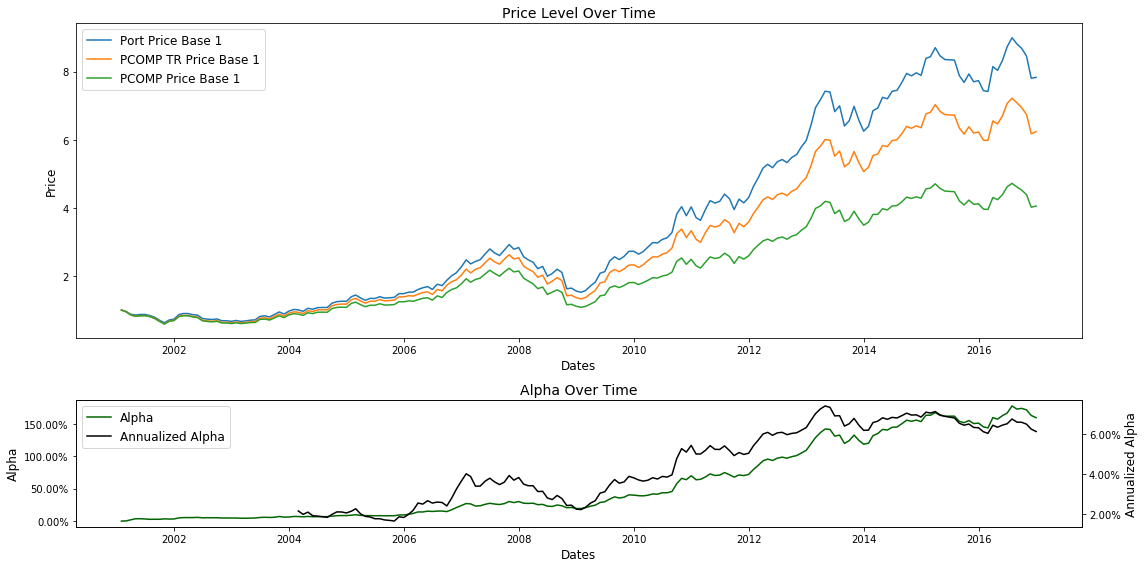

In [33]:
ax1 = plt.subplot2grid((3,2),(0,0), rowspan=2, colspan=2)
ax1.plot(dfptr['Date'], dfptr['Port Price Base 1']);
ax1.plot(dfptr['Date'], dfptr['PCOMP TR Price Base 1']);
ax1.plot(dfptr['Date'], dfptr['PCOMP Price Base 1']);
ax1.set_title('Price Level Over Time', size=14)
ax1.legend(fontsize = 12, );
ax1.set_xlabel('Dates', size = 12);
ax1.set_ylabel('Price', size = 12);

ax2 = plt.subplot2grid((3,2),(2,0),colspan=2)
ln2 = ax2.plot(dfptr['Date'], dfptr['Alpha'], 'DarkGreen');
ax2.set_title('Alpha Over Time', size=14)
ax2.set_xlabel('Dates', size = 12);
ax2.set_ylabel('Alpha', size = 12);
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])


ax3 = ax2.twinx()
ln3 = ax3.plot(dfptr['Date'], dfptr['Annualized Alpha'], color='Black');
ax3.set_ylabel('Annualized Alpha', size = 12);
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

lns = ln2+ln3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0, fontsize=12)

plt.tight_layout()
plt.show()